# Predicting Cervical Cancer

### STEP 1: IMPORTING LIBRARIES AND DATASETS

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


!pip install plotly
!pip install jupyterthemes
import plotly.express as px

from jupyterthemes import jtplot

jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [2]:
cancer_df = pd.read_csv('C://Users//sambh//Downloads//cancer_cervical.csv')

In [3]:
cancer_df.tail(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
948,35,3,18,3,0,0,0,1,5,0,...,?,?,0,0,0,0,0,0,0,0
949,31,3,19,1,0,0,0,1,0.08,1,...,?,?,1,0,0,1,0,0,0,0
950,24,2,16,3,0,0,0,1,5,0,...,?,?,0,0,0,0,0,0,0,0
951,23,2,15,0,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
952,36,3,16,3,1,6,0.3,1,2,0,...,?,?,0,0,0,0,0,0,0,0
953,30,3,14,3,0,0,0,1,2,0,...,?,?,0,0,0,0,0,0,0,0
954,26,8,15,1,1,9,1.35,1,5,1,...,?,?,0,0,0,0,0,0,0,0
955,19,2,15,2,0,0,0,1,0.75,0,...,?,?,0,0,0,0,0,0,0,0
956,35,2,17,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
957,30,3,22,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0


### STEP 2: EXPLORATORY DATA ANALYSIS

In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 968 non-null    int64 
 1   Number of sexual partners           968 non-null    object
 2   First sexual intercourse            968 non-null    object
 3   Num of pregnancies                  968 non-null    object
 4   Smokes                              968 non-null    object
 5   Smokes (years)                      968 non-null    object
 6   Smokes (packs/year)                 968 non-null    object
 7   Hormonal Contraceptives             968 non-null    object
 8   Hormonal Contraceptives (years)     968 non-null    object
 9   IUD                                 968 non-null    object
 10  IUD (years)                         968 non-null    object
 11  STDs                                968 non-null    object

In [5]:
cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,968.000000,968.000000,968.000000,968.000000,968.00000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,26.880165,0.085744,0.024793,0.011364,0.02376,0.032025,0.039256,0.083678,0.051653,0.063017
std,8.375871,0.298017,0.155575,0.106048,0.15238,0.176157,0.194304,0.277047,0.221440,0.243118
min,13.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# REPLACING '?' WITH NaN

cancer_df = cancer_df.replace('?', np.nan)
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,34,3,18,0,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
964,32,2,19,1,0,0,0,1,8,0,...,NaN,NaN,0,0,0,0,0,0,0,0
965,25,2,17,0,0,0,0,1,0.08,0,...,NaN,NaN,0,0,0,0,0,0,1,0
966,33,2,24,2,0,0,0,1,0.08,0,...,NaN,NaN,0,0,0,0,0,0,0,0


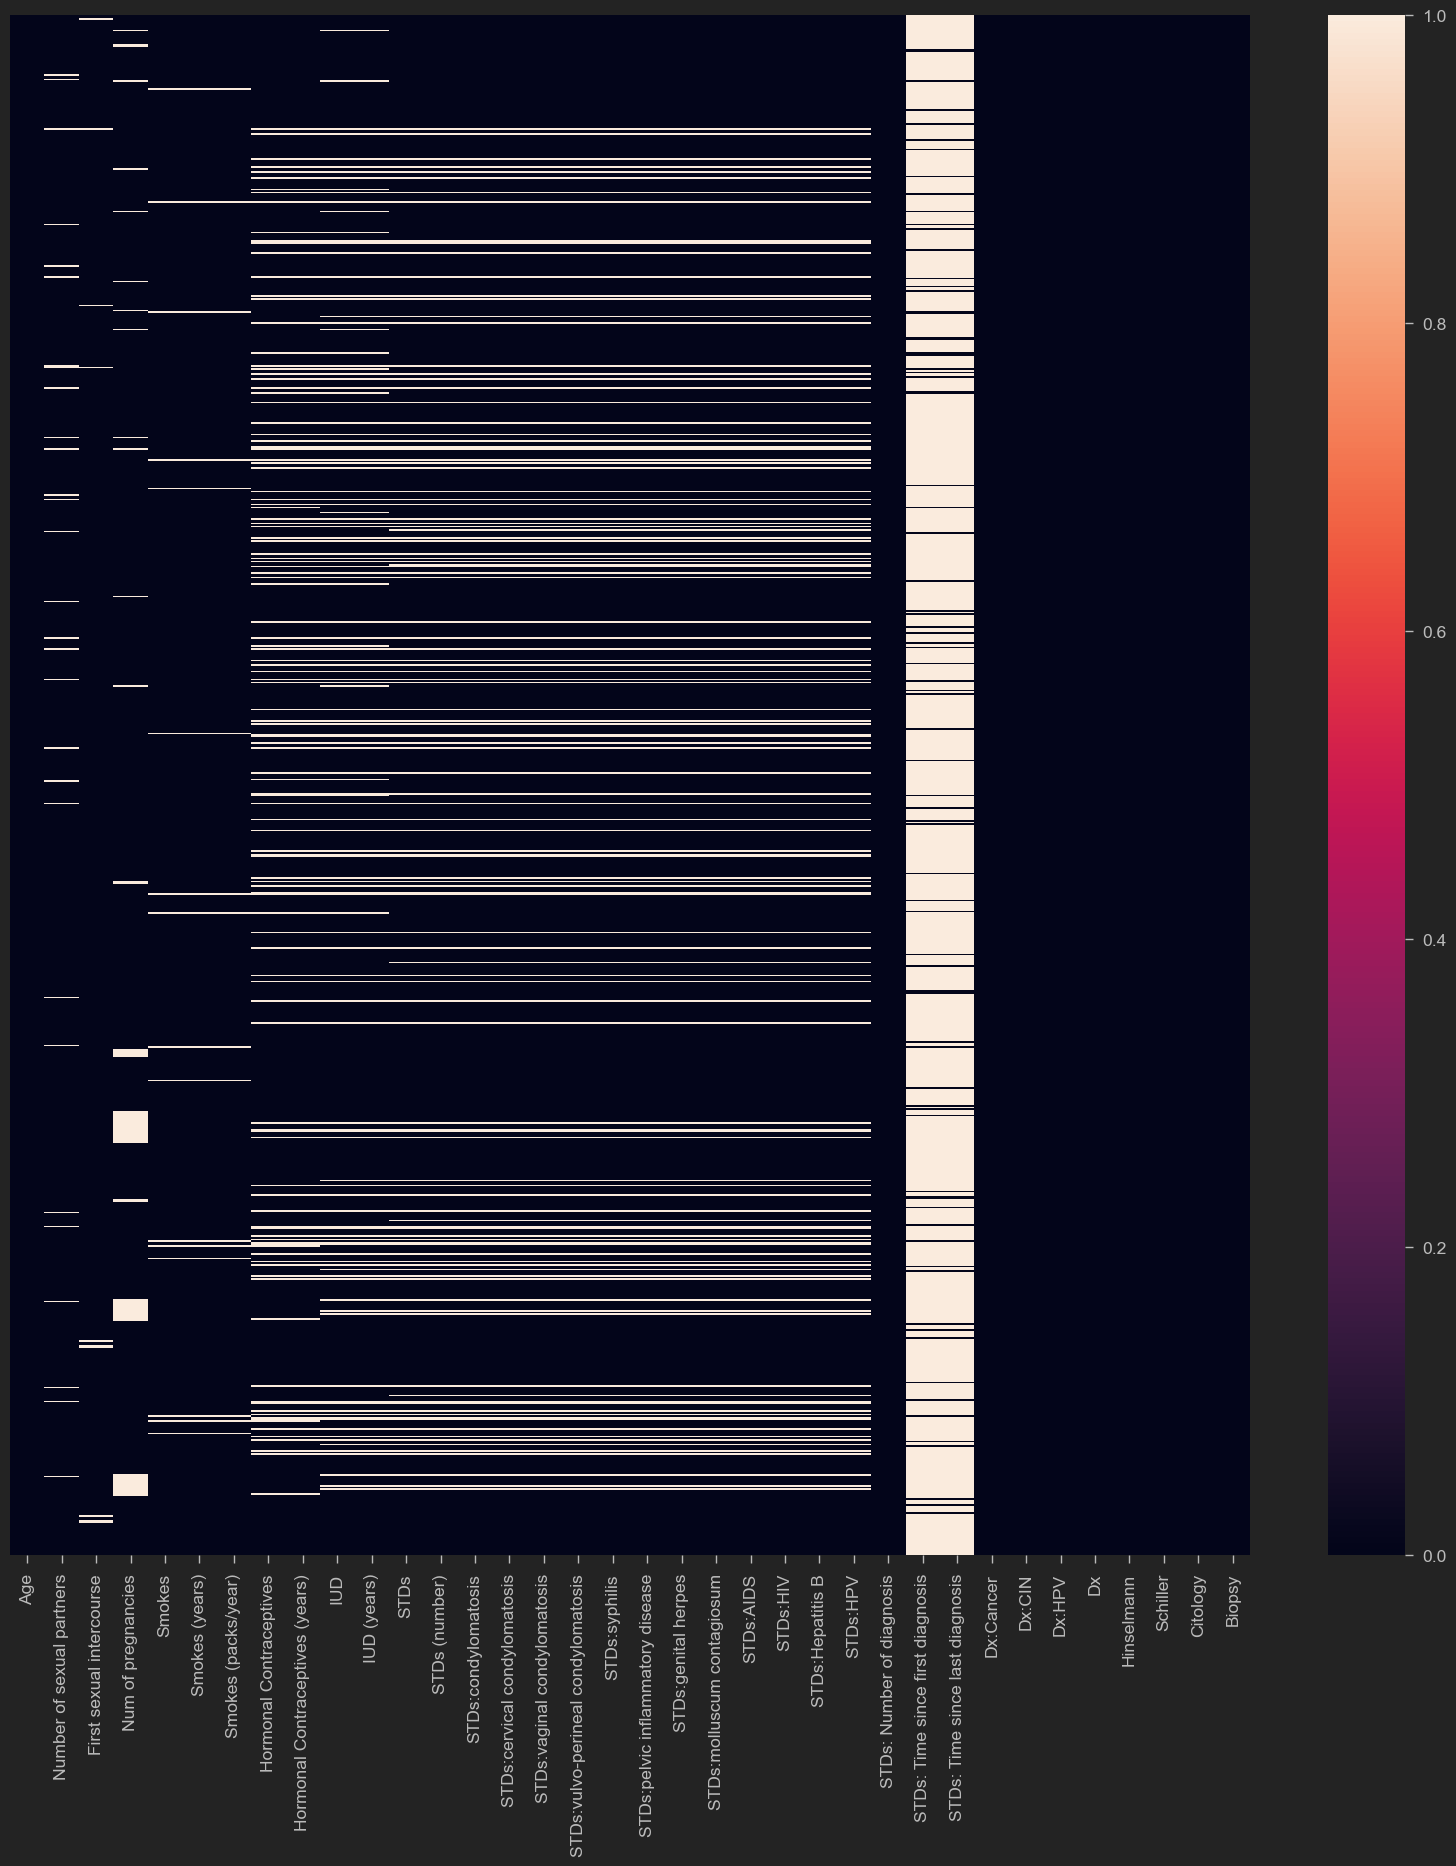

In [7]:
# PLOTTING HEATMAP TO VISUALIZE THE NUMBER OF NaN'S IN TH DATA

plt.figure(figsize=(20,20))
sns.heatmap(cancer_df.isnull(), yticklabels = False)
plt.show()

In [8]:
# WE OBSERVE THAT THERE ARE A LOT OF NAN VALUES IN "STD'S: TIME SINCE FIRST DIAGNOSIS" AND "STD'S: TIME SINCE LAST DIAGNOSIS" 
# SO WE WILL DROP THESE COLUMNS

cancer_df = cancer_df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,34,3,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
964,32,2,19,1,0,0,0,1,8,0,...,0,0,0,0,0,0,0,0,0,0
965,25,2,17,0,0,0,0,1,0.08,0,...,0,0,0,0,0,0,0,0,1,0
966,33,2,24,2,0,0,0,1,0.08,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Converting the column data types, from object to numeric in order to perform Statistical Analysis of the Data

cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 968 non-null    int64  
 1   Number of sexual partners           939 non-null    float64
 2   First sexual intercourse            958 non-null    float64
 3   Num of pregnancies                  898 non-null    float64
 4   Smokes                              952 non-null    float64
 5   Smokes (years)                      952 non-null    float64
 6   Smokes (packs/year)                 952 non-null    float64
 7   Hormonal Contraceptives             846 non-null    float64
 8   Hormonal Contraceptives (years)     846 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD (years)                         835 non-null    float64
 11  STDs                                846 non-n

In [10]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,968.000000,939.000000,958.000000,898.000000,952.000000,952.000000,952.000000,846.000000,846.000000,835.000000,...,846.000000,968.000000,968.000000,968.000000,968.00000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,26.880165,2.554846,16.963466,2.237194,0.147059,1.266903,0.447420,0.637116,2.220088,0.110180,...,0.004728,0.085744,0.024793,0.011364,0.02376,0.032025,0.039256,0.083678,0.051653,0.063017
std,8.375871,1.663584,2.788939,1.442498,0.354351,4.170207,2.149913,0.481116,3.808712,0.313301,...,0.068639,0.298017,0.155575,0.106048,0.15238,0.176157,0.194304,0.277047,0.221440,0.243118
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
cancer_df.mean()

Age                                   26.880165
Number of sexual partners              2.554846
First sexual intercourse              16.963466
Num of pregnancies                     2.237194
Smokes                                 0.147059
Smokes (years)                         1.266903
Smokes (packs/year)                    0.447420
Hormonal Contraceptives                0.637116
Hormonal Contraceptives (years)        2.220088
IUD                                    0.110180
IUD (years)                            0.497772
STDs                                   0.104019
STDs (number)                          0.173759
STDs:condylomatosis                    0.056738
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.004728
STDs:vulvo-perineal condylomatosis     0.055556
STDs:syphilis                          0.022459
STDs:pelvic inflammatory disease       0.002364
STDs:genital herpes                    0.001182
STDs:molluscum contagiosum             0

In [12]:
# REPLACING NULL/NaN values with the mean values:

cancer_df =  cancer_df.fillna(cancer_df.mean())
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.963466,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,34,3.0,18.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
964,32,2.0,19.000000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
965,25,2.0,17.000000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
966,33,2.0,24.000000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


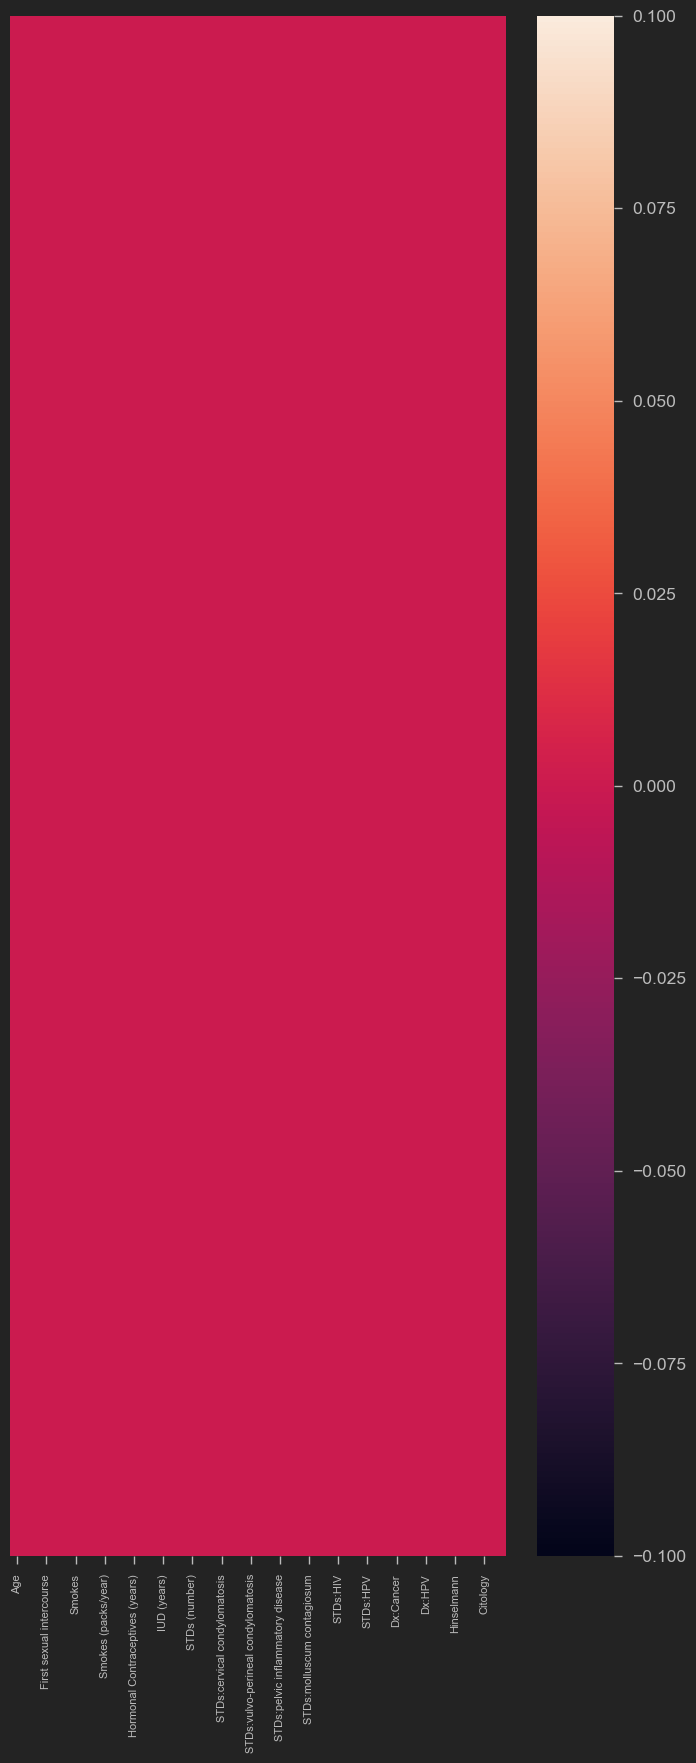

In [13]:
# PLOTTING HEATMAP AGAIN TO VISUALIZE AND CHECK OUR DATA CLEANSING

plt.figure(figsize=(8,20))
sns.heatmap(cancer_df.isnull(), yticklabels = False)
plt.xticks(rotation=90)
plt.tick_params(labelsize=8)
plt.show()

In [14]:
# THUS WE CAN SEE THAT WE HAVE NO NULL VALUES NOW

In [15]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,...,968.000000,968.000000,968.000000,968.000000,968.00000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,26.880165,2.554846,16.963466,2.237194,0.147059,1.266903,0.447420,0.637116,2.220088,0.110180,...,0.004728,0.085744,0.024793,0.011364,0.02376,0.032025,0.039256,0.083678,0.051653,0.063017
std,8.375871,1.638449,2.774481,1.389307,0.351407,4.135563,2.132053,0.449744,3.560355,0.290959,...,0.064163,0.298017,0.155575,0.106048,0.15238,0.176157,0.194304,0.277047,0.221440,0.243118
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.220088,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# THIS THE AGE RANGE FOR PEOPLE INVOLVED IN THE STUDY ARE : (13, 84)

### 3) PERFORMING DATA VISUALIZATION

In [17]:
# WE'LL TRY TO OBSERVE THE CORELATION BETWEEN DIFFERENT FEATURES IN OUR DATASETS:

corr_matrix = cancer_df.corr()

corr_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.093577,0.379491,0.497763,0.067375,0.221940,0.135835,0.055271,0.264464,0.253127,...,0.051677,0.000392,0.121323,0.049268,0.113236,0.098624,-0.001554,0.089444,-0.018961,0.045863
Number of sexual partners,0.093577,1.000000,-0.133415,0.075456,0.247922,0.190126,0.179612,0.012480,0.007429,0.037135,...,0.017075,0.054011,0.023059,0.023192,0.025840,0.027946,-0.040699,0.001395,0.026387,0.001841
First sexual intercourse,0.379491,-0.133415,1.000000,-0.063686,-0.122778,-0.056262,-0.054746,0.006053,0.012262,-0.024815,...,0.045190,0.002542,0.071579,-0.040764,0.048530,0.034135,-0.005010,0.006672,-0.013757,0.009549
Num of pregnancies,0.497763,0.075456,-0.063686,1.000000,0.075733,0.150547,0.086924,0.160707,0.218294,0.199896,...,-0.035694,0.027536,0.039746,0.018087,0.056393,0.037323,0.037152,0.087178,-0.025622,0.047238
Smokes,0.067375,0.247922,-0.122778,0.075733,1.000000,0.732028,0.501461,0.003666,0.054970,-0.037973,...,0.065075,0.074350,-0.007232,-0.044890,0.014768,-0.073701,0.025836,0.037490,-0.014071,0.016021
Smokes (years),0.221940,0.190126,-0.056262,0.150547,0.732028,1.000000,0.724014,-0.012951,0.051621,0.043945,...,0.065865,0.061852,0.047996,-0.032860,0.053161,-0.053952,0.057772,0.073514,-0.015295,0.044762
Smokes (packs/year),0.135835,0.179612,-0.054746,0.086924,0.501461,0.724014,1.000000,0.001158,0.042181,0.016478,...,-0.011341,0.025576,0.084269,-0.022510,0.089094,-0.036958,0.023198,0.012741,-0.000138,0.018984
Hormonal Contraceptives,0.055271,0.012480,0.006053,0.160707,0.003666,-0.012951,0.001158,1.000000,0.440173,0.044131,...,0.052770,-0.036225,0.054821,0.005767,0.060109,0.028204,0.033012,-0.005033,-0.016422,0.010743
Hormonal Contraceptives (years),0.264464,0.007429,0.012262,0.218294,0.054970,0.051621,0.042181,0.440173,1.000000,0.080685,...,0.069772,-0.033397,0.047044,0.005530,0.057618,-0.012667,0.047755,0.074418,0.091497,0.076037
IUD,0.253127,0.037135,-0.024815,0.199896,-0.037973,0.043945,0.016478,0.044131,0.080685,1.000000,...,-0.024557,0.030008,0.145199,0.041181,0.083410,0.164141,0.053474,0.093597,-0.001096,0.054380


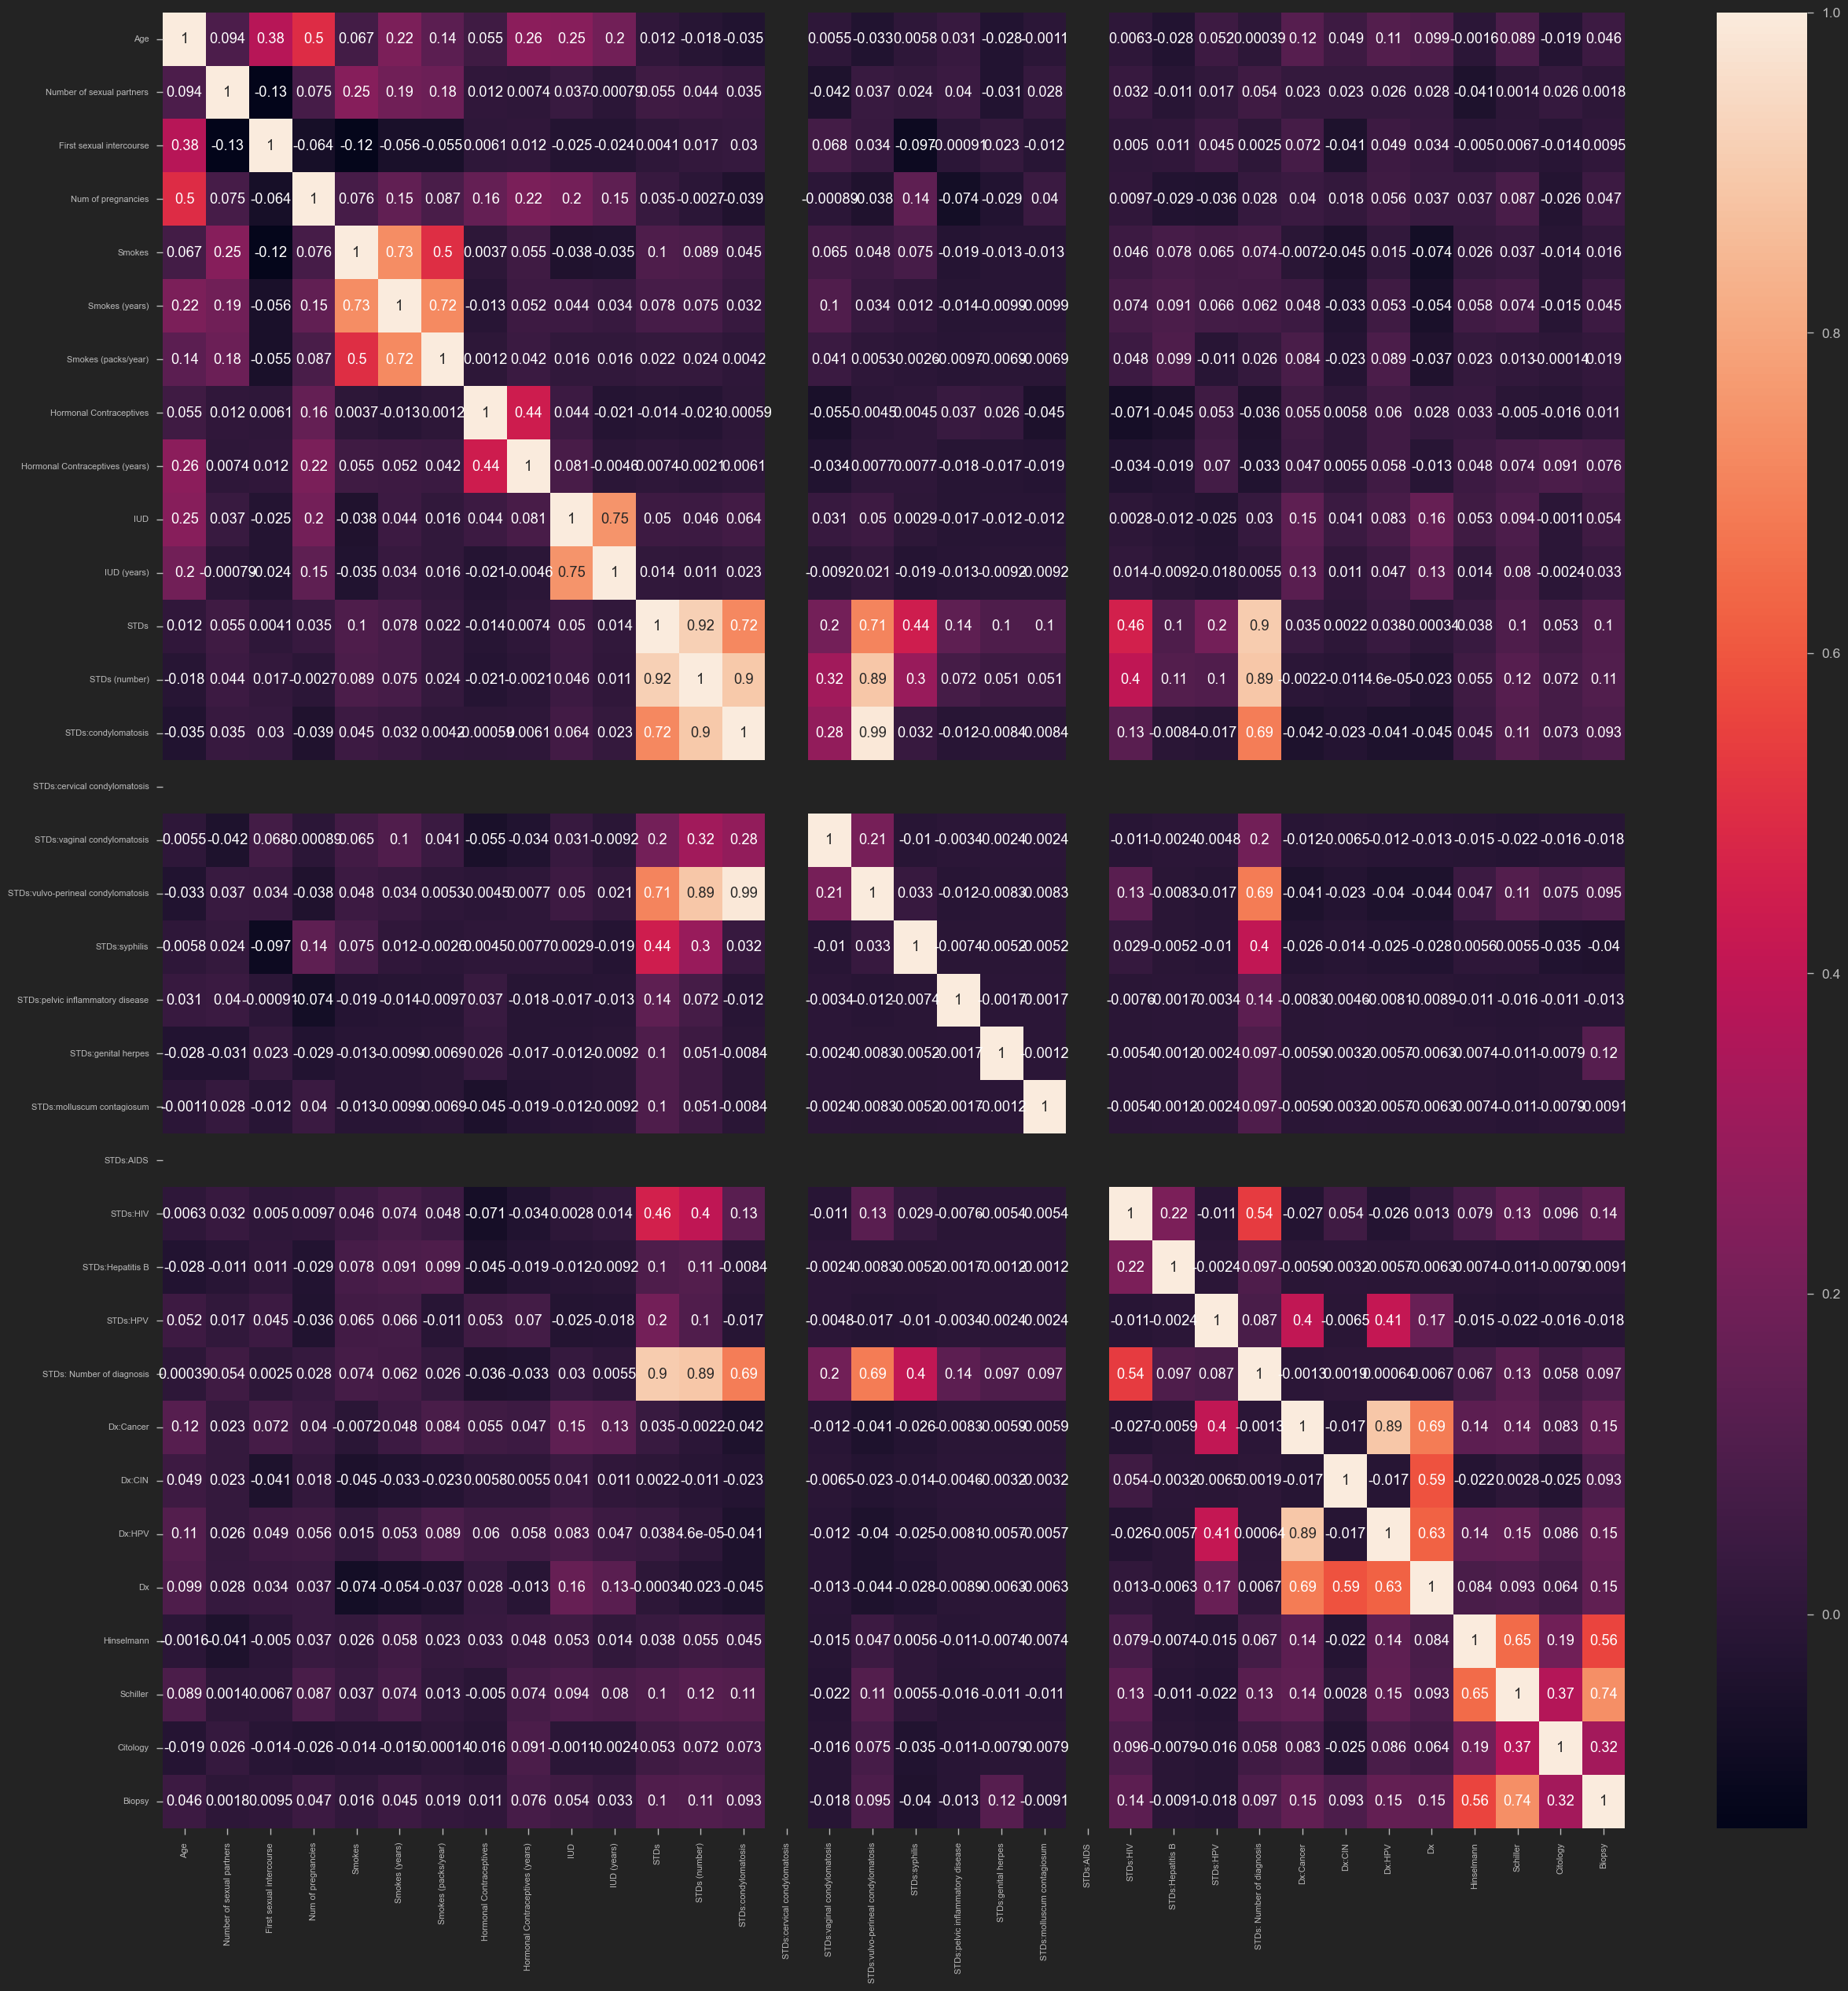

In [18]:
# PLOTTING THE HEATMAP FOR CORRELATION MATRIX

plt.figure(figsize = (30,30))
sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.tick_params(labelsize=8)
plt.show()

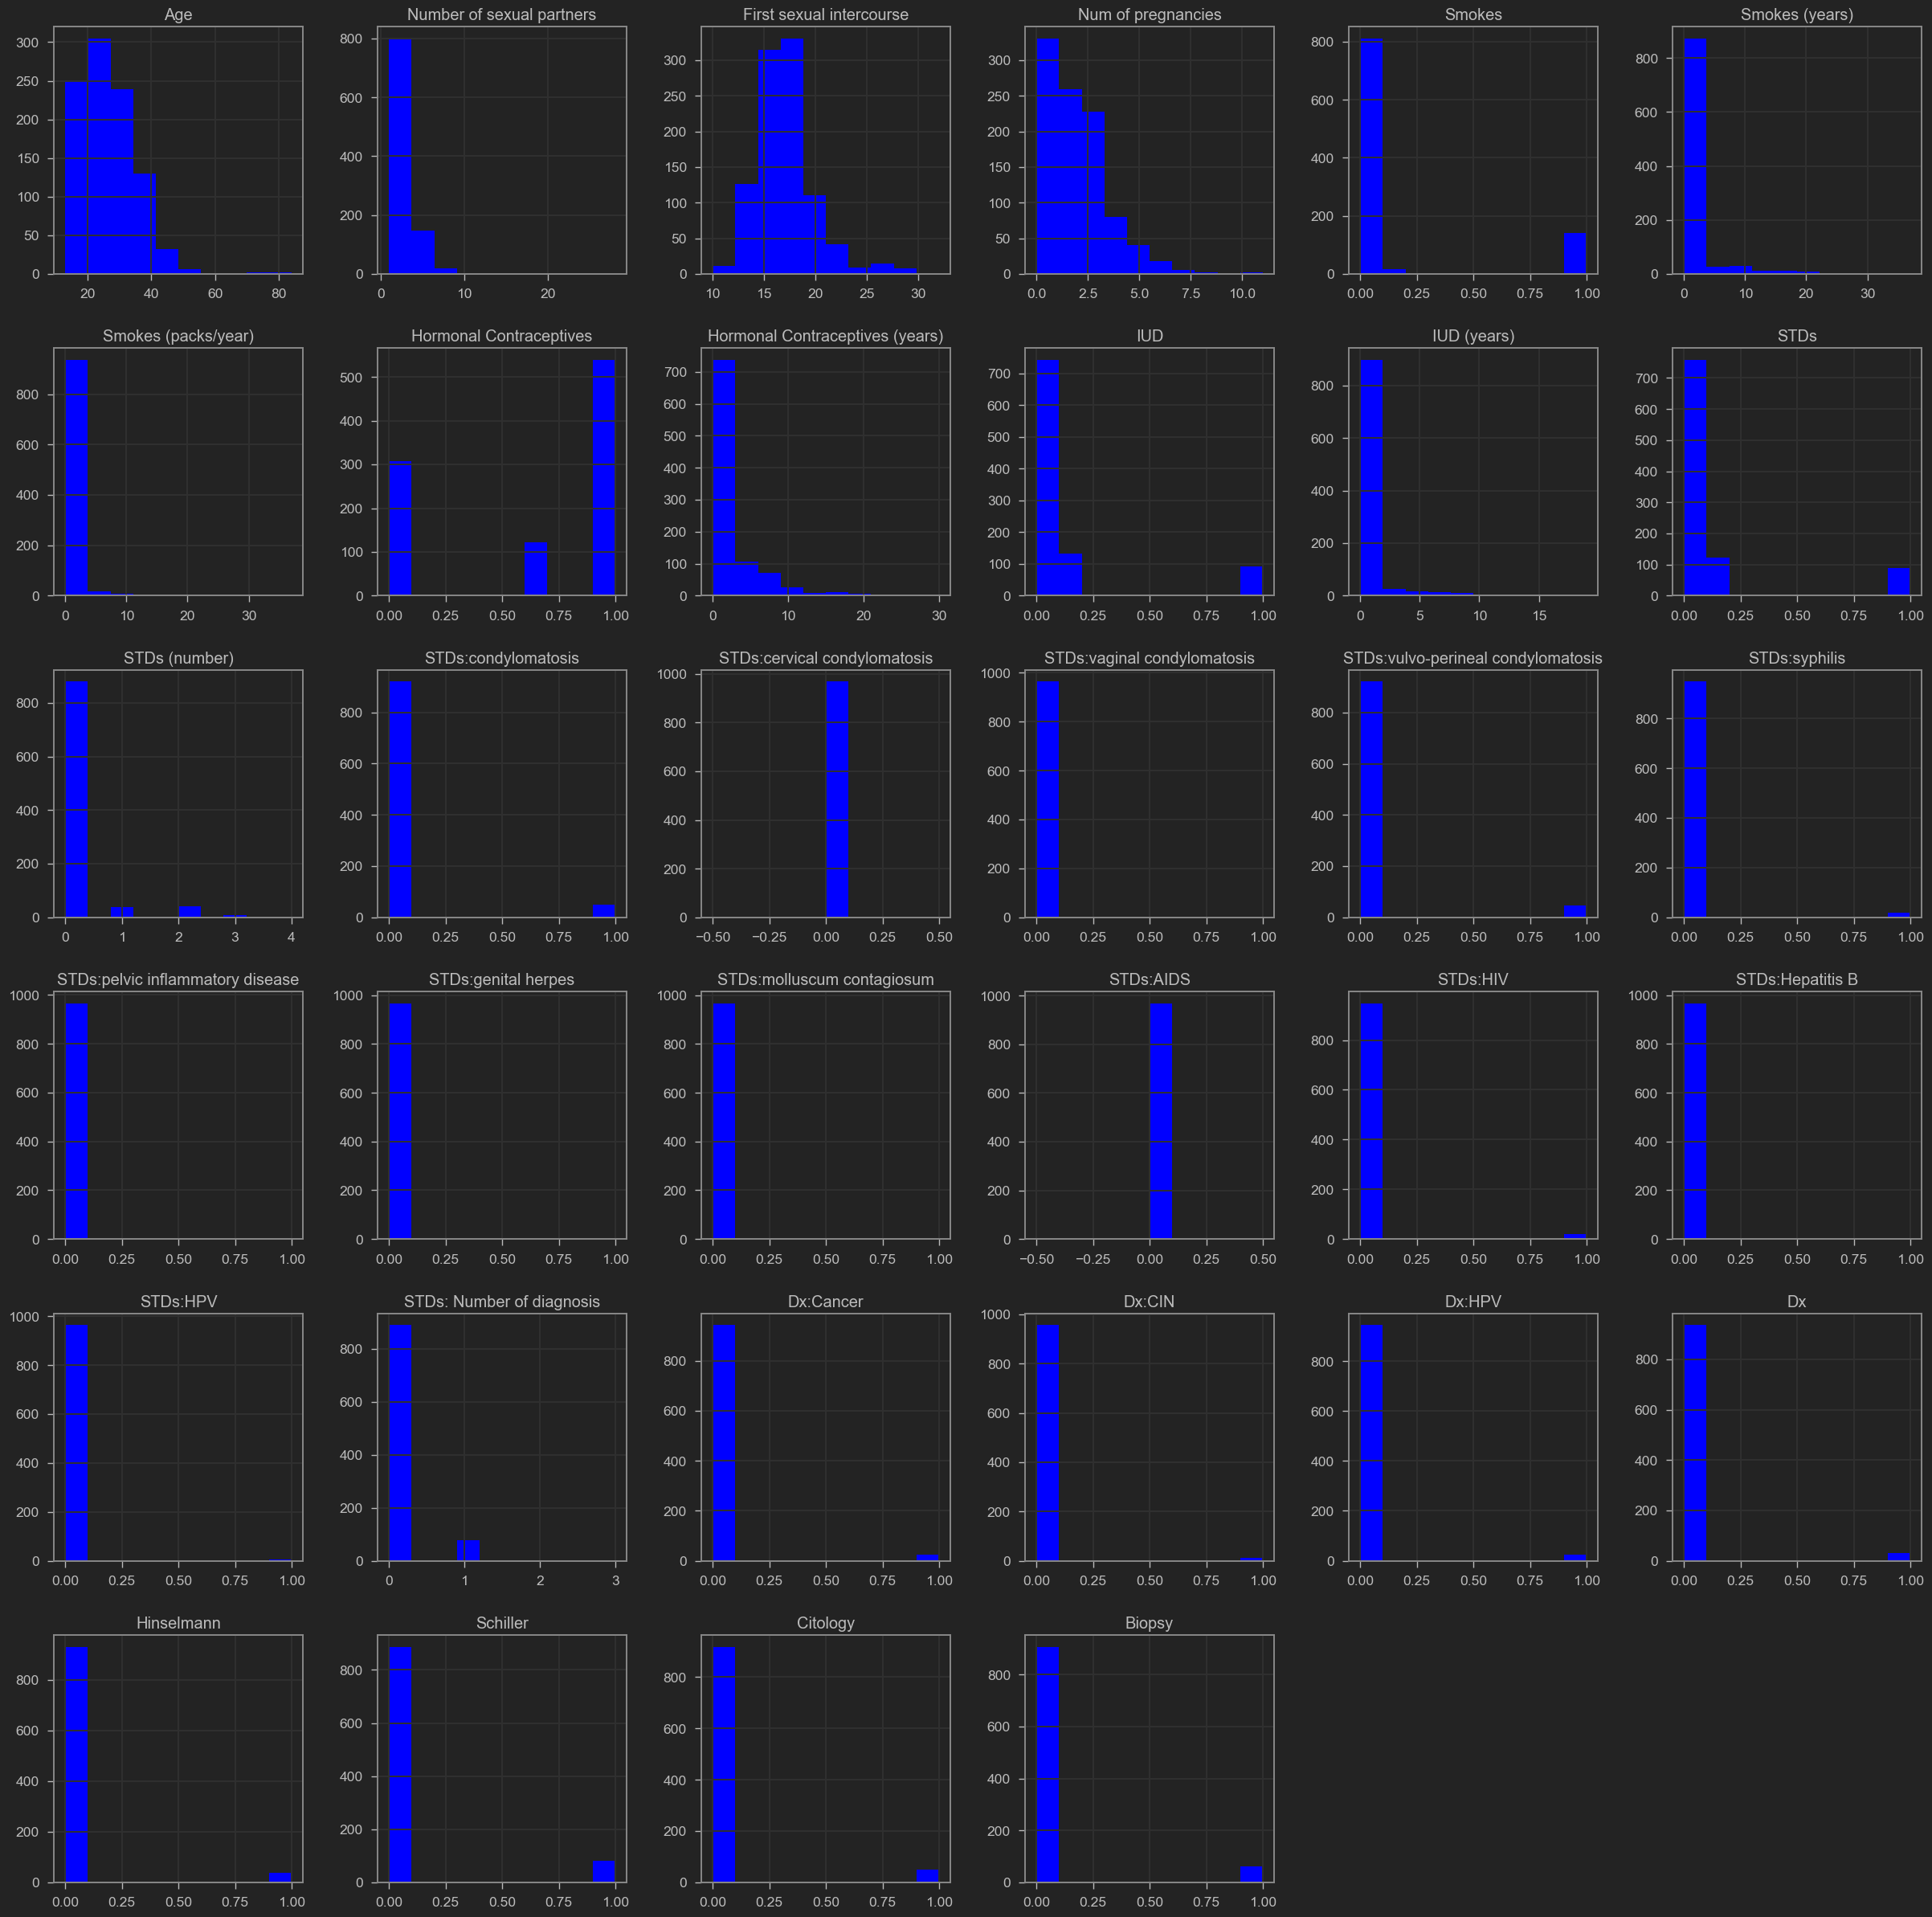

In [19]:
# VISUALIZING THE WHOLE DATAFRAME BY PLOTTING HISTOGRAM
cancer_df.hist(bins = 10, figsize = (30,30), color='blue')
plt.show()

### 4) PREPARING DATA BEFORE TRAINING

In [20]:
# WE SELECT BIOPSY DATA AS OUR TARGET VALUES:

target_df = cancer_df['Biopsy']
input_df = cancer_df.drop(['Biopsy'], axis=1)


In [21]:
X = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

y = y.reshape(-1,1)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X

array([[-1.0607560e+00,  8.8248193e-01, -7.0805323e-01, ...,
        -2.0213911e-01, -3.0219042e-01, -2.3338002e-01],
       [-1.4191128e+00, -9.4946474e-01, -1.0686673e+00, ...,
        -2.0213911e-01, -3.0219042e-01, -2.3338002e-01],
       [ 8.5048050e-01, -9.4946474e-01, -2.9132730e-07, ...,
        -2.0213911e-01, -3.0219042e-01, -2.3338002e-01],
       ...,
       [-2.2459003e-01, -3.3881584e-01,  1.3174837e-02, ...,
        -2.0213911e-01, -3.0219042e-01,  4.2848568e+00],
       [ 7.3102820e-01, -3.3881584e-01,  2.5374730e+00, ...,
        -2.0213911e-01, -3.0219042e-01, -2.3338002e-01],
       [ 2.5321907e-01, -3.3881584e-01,  1.0950170e+00, ...,
        -2.0213911e-01, -3.0219042e-01, -2.3338002e-01]], dtype=float32)

In [24]:
# SPLITTING DATA INTO TRAIN AND TEST DATASETS
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

### 5) TRAINING AND EVALUATING XGBOOST CLASSIFIER

In [25]:
!pip install --upgrade pip
!pip install seaborn
!pip install xgboost

  Using cached pip-23.3.2-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\sambh\anaconda3\python.exe -m pip install --upgrade pip


In [26]:
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 50, n_estimators = 100)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### TESTING OUT RESULTS OF OUR MODEL

In [27]:
result_train = model.score(X_train, y_train)

result_train

0.9961240310077519

In [28]:
result_test = model.score(X_test, y_test)

result_test

0.9587628865979382

In [29]:
y_predict = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        86
         1.0       1.00      0.64      0.78        11

    accuracy                           0.96        97
   macro avg       0.98      0.82      0.88        97
weighted avg       0.96      0.96      0.95        97



#### PLOTTING A CONFUSION MATRIX

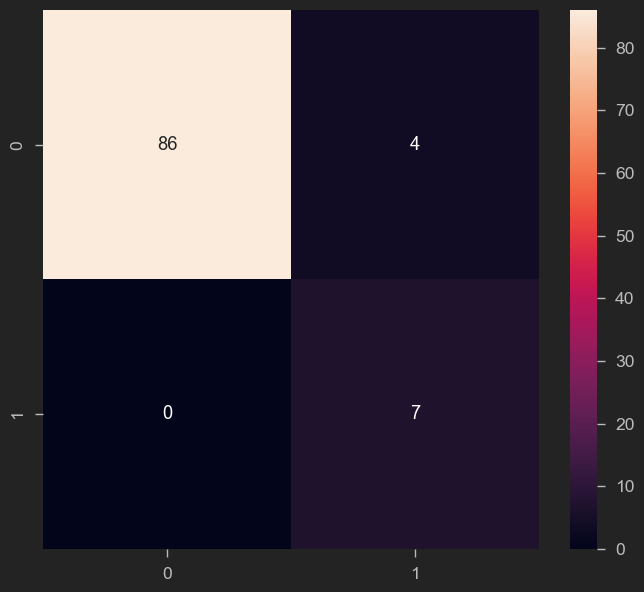

In [31]:
cm = confusion_matrix(y_predict, y_test)

sns.heatmap(cm, annot = True)

plt.show()